In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

# 讀取與儲存資料

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

df.to_csv('housedata.csv',index = False, encoding = 'utf-8')

In [3]:
df = pd.read_csv('housedata.csv')
df

#CRIM
#ZN
#INDUS
#CHAS 
#NOX
#RM
#AGE
#DIS
#RAD 
#TAX
#PTRATIO
#B
#LSTAT
#MEDV

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# 數據特徵視覺化 EDA

In [4]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
        'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
        'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [101]:

scatterplotmatrix(df[cols].values,figsize=(100,100),names = cols ,alpha = 1)
plt.tight_layout()
plt.savefig('feature EDA.jpg',dpi = 300)
plt.show()


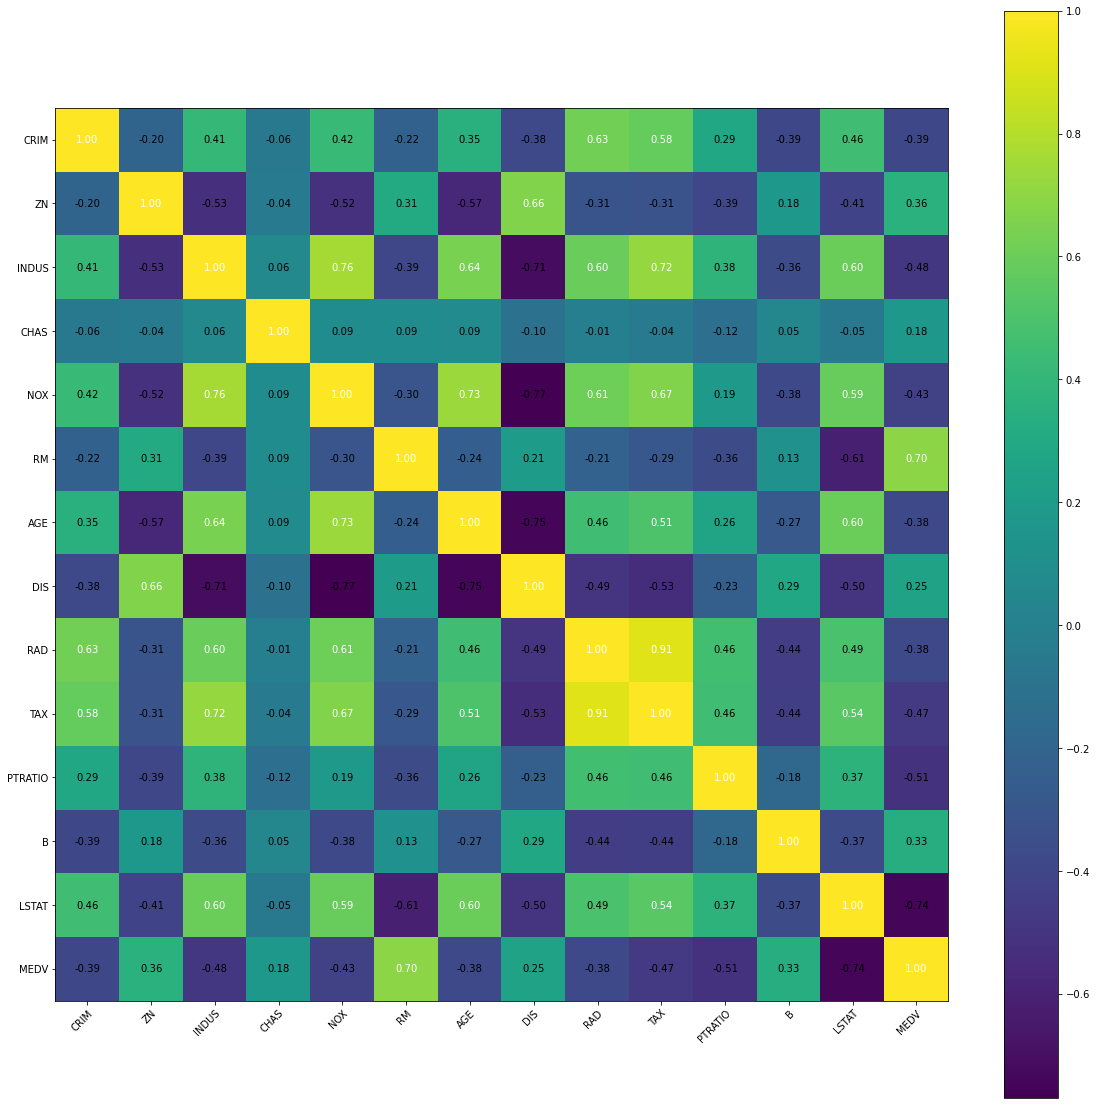

In [99]:
from mlxtend.plotting import heatmap
import numpy as np
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm,
             row_names = cols,
             column_names = cols,
             figsize = (20,20))
plt.savefig('heat map.jpg',dpi = 1080)
plt.show()

# 數據標準化

In [7]:
from sklearn.preprocessing import StandardScaler
x = df[['RM']].values
y = df[['MEDV']].values
sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y).flatten()



# 回歸模型

Text(0, 0.5, 'price')

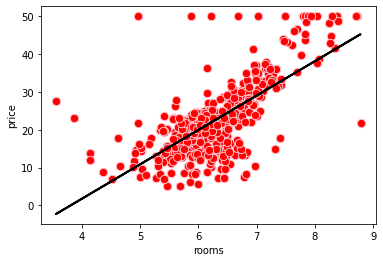

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

plt.scatter(x,y,c = 'red',edgecolors = 'pink',s = 70)
plt.plot(x,lr.predict(x),color = 'black',lw = 2)
plt.xlabel('rooms')
plt.ylabel('price')



#def line1(x,y,model):
#    plt.scatter(x,y,c = 'red',edgecolors = 'pink',s = 70)
#    plt.plot(x,model.predict(x),color = 'black',lw = 2)
#    return None
#
#line1(x,y)

# RANSAC找出離群值與群內值

In [9]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                         max_trials =100,           #最大跌代
                         min_samples = 50,          #隨機選擇最少樣本數
                         loss = 'absolute_loss',
                         residual_threshold = 5.0,  #小於5納入群內植
                         random_state = 0)
ransac.fit(x,y)

C:\Users\MSI\anaconda3\envs\mypython\lib\site-packages\sklearn\linear_model\_ransac.py:354: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(


RANSACRegressor(base_estimator=LinearRegression(), loss='absolute_loss',
                min_samples=50, random_state=0, residual_threshold=5.0)

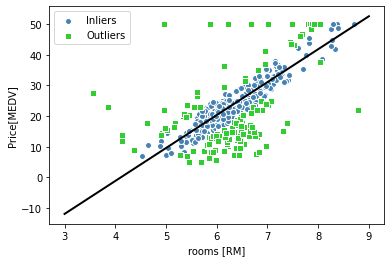

In [10]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_x = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_x[:, np.newaxis])
plt.scatter(x[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(x[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_x, line_y_ransac, color='black', lw=2)   
plt.xlabel('rooms [RM]')
plt.ylabel('Price[MEDV]')
plt.legend(loc='upper left')

plt.show()

In [11]:
print('slope:',ransac.estimator_.coef_)           #斜率
print('intercept:',ransac.estimator_.intercept_)  #截距

slope: [[10.73450881]]
intercept: [-44.08906429]


# 評估模組效能

In [12]:
#模型訓練

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x = df.iloc[:,:-1].values
y = df['MEDV'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size = 0.3,
                                                 random_state = 0)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print('%.3f' %lr.score(x_train,y_train))   
print('%.3f' %lr.score(x_test,y_test))     

0.765
0.673


No handles with labels found to put in legend.


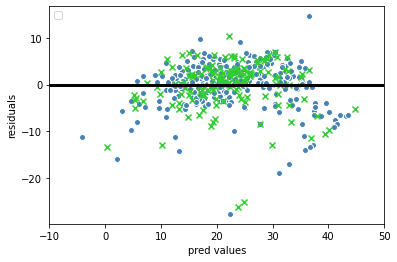

In [13]:
#視覺化殘差圖
import matplotlib.pyplot as plt

plt.scatter(y_train_pred,y_train_pred-y_train,
            c='steelblue',marker='o',edgecolors='white')
plt.scatter(y_test_pred,y_test_pred-y_test,
            c='limegreen',marker='x',edgecolors='white')
plt.xlabel('pred values')
plt.ylabel('residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,colors='black',lw=3)
plt.xlim([-10,50])
plt.savefig('lr.png')
plt.show()


In [14]:
#使用MSE 校調較有用
from sklearn.metrics import mean_squared_error , r2_score
print('mse train:%.3f , mse test:%.3f' %
     (mean_squared_error(y_train,y_train_pred),        #過度擬合
      mean_squared_error(y_test,y_test_pred)))

print('R^2 train:%.3f, R^2 test:%.3f'%
     (r2_score(y_train,y_train_pred),
      r2_score(y_test,y_test_pred)))

mse train:19.958 , mse test:27.196
R^2 train:0.765, R^2 test:0.673


# 非線性關塑模

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [57]:
df = pd.read_csv('housedata.csv')

x = df[['LSTAT']].values
y = df['MEDV'].values

lr = LinearRegression()

quadratic1 = PolynomialFeatures(degree = 2)   #二階多項式
quadratic2 = PolynomialFeatures(degree = 3)   #三階多項式  值越大增加模型複雜度易過度擬合
x_quadratic1 = quadratic1.fit_transform(x)
x_quadratic2 = quadratic2.fit_transform(x)

x_fit = np.arange(x.min(),x.max(),1)[:,np.newaxis]

lr = lr.fit(x,y)
y_lin_fit = lr.predict(x_fit)
linear_r2 = r2_score(y,lr.predict(x))

lr = lr.fit(x_quadratic1,y)
y_quadratic1_fit = lr.predict(quadratic1.fit_transform(x_fit))
quadratic1_r2 = r2_score(y,lr.predict(x_quadratic1))

lr = lr.fit(x_quadratic2,y)
y_quadratic2_fit = lr.predict(quadratic2.fit_transform(x_fit))
quadratic2_r2 = r2_score(y,lr.predict(x_quadratic2))

print(linear_r2,quadratic1_r2,quadratic2_r2)

0.5441462975864797 0.6407168971636612 0.6578476405895719


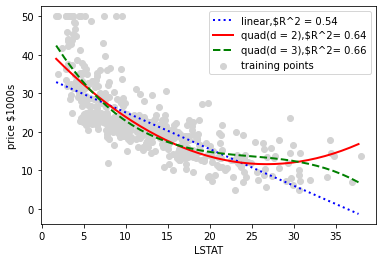

In [56]:
plt.scatter(x,y,label = 'training points',color = 'lightgray')

plt.plot(x_fit,y_lin_fit,label = 'linear,$R^2 = %.2f' % linear_r2,
         color = 'blue',lw = 2,linestyle =':')

plt.plot(x_fit,y_quadratic1_fit, label = 'quad(d = 2),$R^2= %.2f' % quadratic1_r2,
         color = 'red',lw = 2,linestyle ='-')
plt.plot(x_fit,y_quadratic2_fit, label = 'quad(d = 3),$R^2= %.2f' % quadratic2_r2,
         color = 'green',lw = 2,linestyle ='--')

plt.xlabel('LSTAT')
plt.ylabel('price $1000s')
plt.legend(loc = 'upper right')
plt.show()

# 決策樹回歸

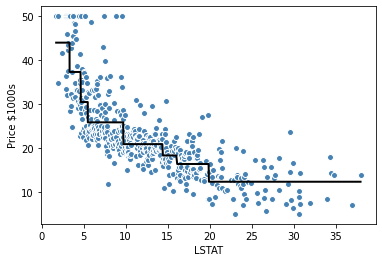

In [73]:
from sklearn.tree import DecisionTreeRegressor

x = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(x, y)

sort_idx = x.flatten().argsort()

plt.scatter(x[sort_idx],y[sort_idx],color = 'steelblue',edgecolors='white')
plt.plot(x[sort_idx],tree.predict(x[sort_idx]),color='black',lw=2)
plt.xlabel('LSTAT')
plt.ylabel('Price $1000s')
plt.savefig('dectree.png', dpi=1080)
plt.show()

# 隨機森林回歸

C:\Users\MSI\anaconda3\envs\mypython\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


MSE train: 5.630, test: 45.144
R^2 train: 0.930, test: 0.500


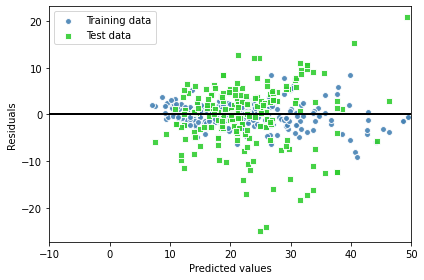

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, random_state=1)
forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(x_train, y_train)
y_train_pred = forest.predict(x_train)
y_test_pred = forest.predict(x_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

plt.savefig('rantree.png', dpi=1080)
plt.show()
